In [ ]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

import numpy as np

import matplotlib.pyplot as plt


In [ ]:
batch_size = 128
num_classes = 10
epochs = 20



In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


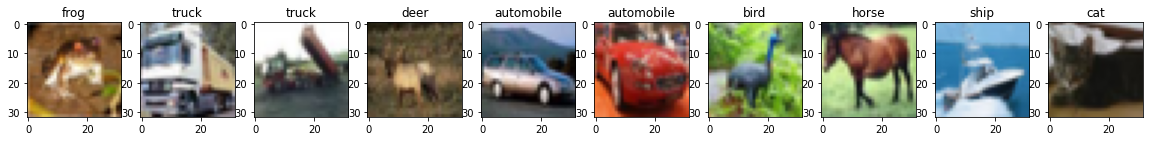

In [ ]:
fig,ax=plt.subplots(1,10,figsize=(20,10))
for ii in range(10):
  ax[ii].imshow(x_train[ii])
  ax[ii].set_title(cifar_classes[int(y_train[ii])])

In [ ]:
32*32*3

3072

In [ ]:

x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



50000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

NameError: ignored

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
391/391 [==============================] - 3s 7ms/step - loss: 1.3297 - accuracy: 0.5262 - val_loss: 1.4432 - val_accuracy: 0.4914
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 1.3087 - accuracy: 0.5349 - val_loss: 1.3760 - val_accuracy: 0.5146
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 1.2790 - accuracy: 0.5444 - val_loss: 1.4785 - val_accuracy: 0.4804
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 1.2610 - accuracy: 0.5512 - val_loss: 1.4259 - val_accuracy: 0.4966
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 1.2362 - accuracy: 0.5608 - val_loss: 1.3817 - val_accuracy: 0.5106
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 1.2136 - accuracy: 0.5687 - val_loss: 1.3825 - val_accuracy: 0.5107
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 1.1906 - accuracy: 0.5758 - val_loss: 1.4097 - val_accuracy: 0.5103
Epoch 

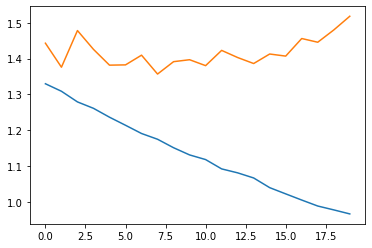

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

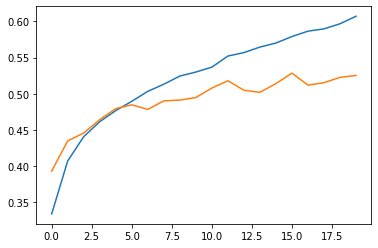

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
ypred=model.predict(x_test)


In [ ]:
np.argmax(ypred,axis=1)

array([3, 8, 8, ..., 2, 4, 7])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusionmatrix=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(ypred,axis=1))

In [ ]:
confusionmatrix

array([[597,  18,  51,  24,  47,  28,  19,  15, 156,  45],
       [ 47, 559,  15,  16,  22,  32,  17,  19, 106, 167],
       [ 72,  14, 350,  54, 205, 121,  97,  42,  30,  15],
       [ 30,  10,  72, 322,  83, 267, 101,  34,  42,  39],
       [ 44,   6,  90,  46, 529,  79, 118,  41,  37,  10],
       [ 23,   5,  60, 184,  73, 493,  65,  48,  28,  21],
       [ 13,   7,  55,  70, 135,  77, 593,  15,  15,  20],
       [ 55,   5,  57,  54, 132,  96,  27, 499,  21,  54],
       [ 91,  36,   6,  18,  28,  28,  14,   9, 722,  48],
       [ 55, 114,  16,  20,  24,  30,  22,  25, 106, 588]])

In [ ]:
cifar_classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

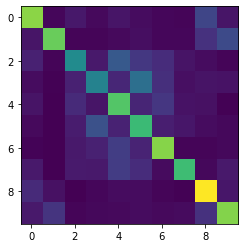

In [ ]:
plt.imshow(confusionmatrix)

# CNN example

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

import numpy as np

import matplotlib.pyplot as plt


In [ ]:

#x_train = x_train.reshape(-1, 3072)
#x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



50000 train samples
10000 test samples


In [ ]:
input_shape=(32,32,3)

In [ ]:
model =  Sequential()

convin1=Conv2D(128, kernel_size=(4, 4),
			 activation='relu',
			 input_shape=input_shape,padding='same')
model.add(convin1)
model.add(Conv2D(64, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4,4), activation='relu'))
model.add(Conv2D(64, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#    model.add(Conv2D(64, (2,2), activation='relu'))
#    model.add(Conv2D(64, (2,2), activation='relu'))


#    model.add(ZeroPadding2D(padding=(1, 1)))
#    model.add(Conv2D(64, (4,4), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       6272      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        131136    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        65600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
391/391 [==============================] - 30s 33ms/step - loss: 1.9599 - accuracy: 0.2676 - val_loss: 1.3687 - val_accuracy: 0.5029
Epoch 2/20
391/391 [==============================] - 12s 32ms/step - loss: 1.3160 - accuracy: 0.5270 - val_loss: 1.1478 - val_accuracy: 0.5900
Epoch 3/20
391/391 [==============================] - 12s 32ms/step - loss: 1.0817 - accuracy: 0.6165 - val_loss: 1.0365 - val_accuracy: 0.6305
Epoch 4/20
391/391 [==============================] - 13s 32ms/step - loss: 0.9250 - accuracy: 0.6742 - val_loss: 0.9097 - val_accuracy: 0.6777
Epoch 5/20
391/391 [==============================] - 13s 32ms/step - loss: 0.8307 - accuracy: 0.7065 - val_loss: 0.8676 - val_accuracy: 0.6926
Epoch 6/20
391/391 [==============================] - 13s 33ms/step - loss: 0.7314 - accuracy: 0.7452 - val_loss: 0.8516 - val_accuracy: 0.7023
Epoch 7/20
391/391 [==============================] - 13s 33ms/step - loss: 0.6546 - accuracy: 0.7682 - val_loss: 0.8352 - val_accuracy:

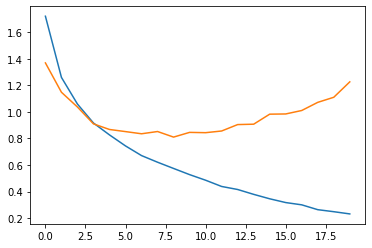

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

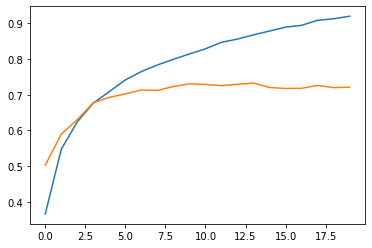

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
ypred=model.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusionmatrix=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(ypred,axis=1))

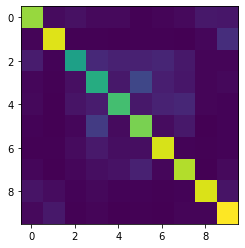

In [ ]:
plt.imshow(confusionmatrix)